In [4]:
from datetime import datetime
import os
import pandas_datareader.data as pdr

In [8]:
#importing Apple stock data from tingo through pandas_datareader
data=pdr.get_data_tiingo('AAPL',api_key='b344e2df2f681e0e2bd6adb7b9b0c967a0ec59dd')

C:\Users\91916\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [9]:
data.to_csv('AAPL.csv')#converting  file to csv...

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("AAPL.csv")

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-17 00:00:00+00:00,179.10,179.25,175.07,176.15,32752734,42.520816,42.556428,41.564038,41.820445,131010936,0.0,1.0
1,AAPL,2018-01-18 00:00:00+00:00,179.26,180.10,178.25,179.37,30234512,42.558802,42.758230,42.319014,42.584918,120938048,0.0,1.0
2,AAPL,2018-01-19 00:00:00+00:00,178.46,179.58,177.41,178.61,30827809,42.368871,42.634774,42.119586,42.404483,123311236,0.0,1.0
3,AAPL,2018-01-22 00:00:00+00:00,177.00,177.78,176.60,177.30,26023683,42.022247,42.207430,41.927281,42.093471,104094732,0.0,1.0
4,AAPL,2018-01-23 00:00:00+00:00,177.04,179.44,176.82,177.30,31702531,42.031743,42.601536,41.979512,42.093471,126810124,0.0,1.0


In [13]:
df.shape

(1258, 14)

In [14]:
df[1248:]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1248,AAPL,2022-12-30 00:00:00+00:00,129.93,129.9500,127.43,128.410,77034209,129.93,129.9500,127.43,128.410,77034209,0.0,1.0
1249,AAPL,2023-01-03 00:00:00+00:00,125.07,130.9000,124.17,130.280,112117471,125.07,130.9000,124.17,130.280,112117471,0.0,1.0
1250,AAPL,2023-01-04 00:00:00+00:00,126.36,128.6557,125.08,126.890,89113633,126.36,128.6557,125.08,126.890,89113633,0.0,1.0
1251,AAPL,2023-01-05 00:00:00+00:00,125.02,127.7700,124.76,127.130,80962708,125.02,127.7700,124.76,127.130,80962708,0.0,1.0
1252,AAPL,2023-01-06 00:00:00+00:00,129.62,130.2900,124.89,126.010,87754715,129.62,130.2900,124.89,126.010,87754715,0.0,1.0
1253,AAPL,2023-01-09 00:00:00+00:00,130.15,133.4100,129.89,130.465,70790813,130.15,133.4100,129.89,130.465,70790813,0.0,1.0
1254,AAPL,2023-01-10 00:00:00+00:00,130.73,131.2636,128.12,130.260,63896155,130.73,131.2636,128.12,130.260,63896155,0.0,1.0
1255,AAPL,2023-01-11 00:00:00+00:00,133.49,133.5100,130.46,131.250,69458949,133.49,133.5100,130.46,131.250,69458949,0.0,1.0
1256,AAPL,2023-01-12 00:00:00+00:00,133.41,134.2600,131.44,133.880,71379648,133.41,134.2600,131.44,133.880,71379648,0.0,1.0
1257,AAPL,2023-01-13 00:00:00+00:00,134.76,134.9200,131.66,132.030,57809719,134.76,134.9200,131.66,132.030,57809719,0.0,1.0


In [15]:
#now we will be doing prdediction on close col in aapl.csv so taking it in other data...also in time series forecasting data should  be 1D so...
df1=df.reset_index()['close']

In [16]:
df1.head()

0    179.10
1    179.26
2    178.46
3    177.00
4    177.04
Name: close, dtype: float64

In [17]:
df1.shape

(1258,)

In [18]:
df2=df1.copy()

In [19]:
df2.head()

0    179.10
1    179.26
2    178.46
3    177.00
4    177.04
Name: close, dtype: float64

In [23]:
df2.shape

(1258,)

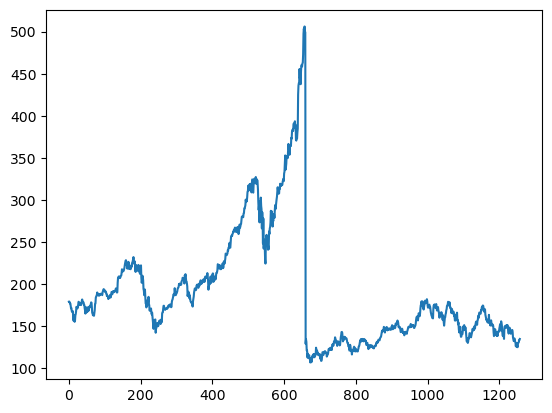

In [20]:
#now plotting df2 
import matplotlib.pyplot as plt
plt.plot(df2)

In [21]:
#also we are scaling data because lstm is sensitive to range of data...
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scale=MinMaxScaler(feature_range=(0,1))#feature_range gives from where to wher our values should lies...
df3=scale.fit_transform(np.array(df2).reshape(-1,1))

In [24]:
df3#this is how our df3 looks like after scaling df2...in array

array([[0.18098936],
       [0.18139011],
       [0.17938635],
       ...,
       [0.06675016],
       [0.06654978],
       [0.06993112]])

In [26]:
#now it is sequence data where present data depend on previous data so we are dividing it in train test...\
#and for sequence data we always use LSTM model.....(imp)
train_size=int(len(df3)*0.65)#65% of df3 data will be in train data
test_size=len(df3)-train_size#this is our test size of test dat which is  len(df3)-train_size
#now 
train_data,test_data=df3[0:train_size,:],df3[train_size:len(df3),:1]

In [27]:
train_size

817

In [28]:
test_size

441

In [29]:
#now we will create timestamp....timestamp is value or no of days previous data to predict current data...so we are creating function to divide data in x_train,y_train by time stamp...
#previous day no of values will be in x_train and in y_train we are taking previous days op...
# like timestamp is 3...so we are taking previous 3 days data to predict current data...

#  f1   f2   f3   op
#  120 130  125   140  
# so we are taking f1,f2,f3(feature) in x_train and op in y_train...

In [33]:
#we are creating function tdivide our df3 data in x_train,y_train by timestamp...
import numpy as np
def create_dataset(dataset,timestamp=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestamp-1):
        a=dataset[i:(i+timestamp),0]
        dataX.append(a)
        dataY.append(dataset[i+timestamp,0])
    return np.array(dataX), np.array(dataY)

In [35]:
#now we are created function now divide data in x_train,y_train...
time_step=100#taking time_step as 100(no of previous day data)
x_train,y_train=create_dataset(train_data,time_step)#di9viding train_data i9hn x_train,y_train...

x_test,y_test=create_dataset(test_data,time_step)#dividing test data in x_test ,y_test

In [36]:
x_train

array([[0.18098936, 0.18139011, 0.17938635, ..., 0.21825924, 0.21695679,
        0.21254853],
       [0.18139011, 0.17938635, 0.17572949, ..., 0.21695679, 0.21254853,
        0.21137132],
       [0.17938635, 0.17572949, 0.17582968, ..., 0.21254853, 0.21137132,
        0.21400125],
       ...,
       [0.03110833, 0.03371321, 0.03143394, ..., 0.0527489 , 0.05891046,
        0.06551033],
       [0.03371321, 0.03143394, 0.02802755, ..., 0.05891046, 0.06551033,
        0.06111459],
       [0.03143394, 0.02802755, 0.02955542, ..., 0.06551033, 0.06111459,
        0.06910457]])

In [37]:
y_train

array([2.11371321e-01, 2.14001252e-01, 2.10043832e-01, 2.10294302e-01,
       2.05385097e-01, 2.05134627e-01, 1.97495304e-01, 1.99524108e-01,
       1.96919224e-01, 1.95566688e-01, 1.88678773e-01, 1.94339386e-01,
       1.93663118e-01, 1.97019411e-01, 1.96042580e-01, 2.01227301e-01,
       1.93061991e-01, 1.96768942e-01, 2.03206011e-01, 2.09743269e-01,
       2.09167188e-01, 2.02980589e-01, 2.10870382e-01, 2.11621791e-01,
       2.10569818e-01, 2.11922354e-01, 2.09292423e-01, 2.12999374e-01,
       2.11897307e-01, 2.12323106e-01, 2.15804634e-01, 2.20363181e-01,
       2.18835316e-01, 2.10745147e-01, 2.08065122e-01, 2.09016907e-01,
       2.37094552e-01, 2.51847214e-01, 2.53350031e-01, 2.56055103e-01,
       2.51145899e-01, 2.51496556e-01, 2.55579211e-01, 2.52197871e-01,
       2.55554164e-01, 2.57758297e-01, 2.58985598e-01, 2.66700063e-01,
       2.77370069e-01, 2.72060113e-01, 2.71008140e-01, 2.71033187e-01,
       2.72135254e-01, 2.73813400e-01, 2.78271760e-01, 2.82680025e-01,
      

In [38]:
print(x_test.shape)
print(y_test.shape)

(340, 100)
(340,)


In [39]:

#now converting train and x_test in 3D...for LSTM...also for time series we need data in (1,1,1) so we are doing it in lstm...x_train,x_test
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [41]:
x_train.shape

(716, 100, 1)

In [40]:
#now importing lstm sequential and dense...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
#now building model lstm...
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))#lstm with 100 neuron with input shape as 100,1
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))#taking only one neuron at op for predicting result...
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0033 - val_loss: 6.3252e-04
Epoch 2/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0031 - val_loss: 3.4248e-04
Epoch 3/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0025 - val_loss: 5.7396e-04
Epoch 4/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0025 - val_loss: 3.5996e-04
Epoch 5/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0020 - val_loss: 3.1791e-04
Epoch 6/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0017 - val_loss: 2.5266e-04
Epoch 7/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0017 - val_loss: 2.4562e-04
Epoch 8/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0015 - val_loss: 2.4861e-04
Epoch 9/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0020 - val_loss: 2.4837e-04
Epoch 10/100
12/12 [==============================] - 1s 96m

In [59]:
#now lets do prediction...on train and test data
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 18ms/step


In [60]:
#now we need to inverse scaling beacuse we need our real values to calculate or predict... we cant get values in .00 so we are inverse scaling our train and test scaled data...
##Transformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [61]:
#### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.24138049400318

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

156.1482578922927

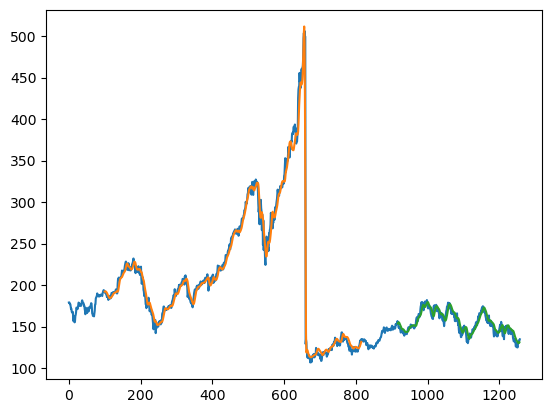

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
#green colred line shoews test data..orange shows train...

In [65]:
#now we are taking previous 100 days test data to prdict next 30 days dat by reshaping data in (1,-1)

In [69]:
len(test_data) #total len is 441 so we are taking data from 341 to 441

441

In [70]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [77]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [78]:
len(temp_input)

101

In [79]:
temp_input

[0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,

In [89]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
#here we are predicting data for 30 days also from skipping 1 position at each loop,reshaping it and doing prediction on it....and adding it to the list...

0 day input [0.08328115 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812
 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075
 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664
 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555
 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444
 0.08541014 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958
 0.07428929 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424
 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344 0.04566061
 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016
 0.06654978 0.06993112 0.06595693 0.06830044 0.07022364 0.07180202
 0.07314344 0.07433577 0.07543859 0.07648937 0.07751131 0.07851891
 0.07952144 0.08052464 0.0815316  0.08254325 0.08355889 0.08457644
 0.0855931  0.08660558 0.08761059 0.08860512 0.08958

In [95]:
day_new=np.arange(1,101)#here we are taking previous 100 days data
day_pred=np.arange(101,131)#in df_pred we are takinf 30 days for prediction from 101 to 131

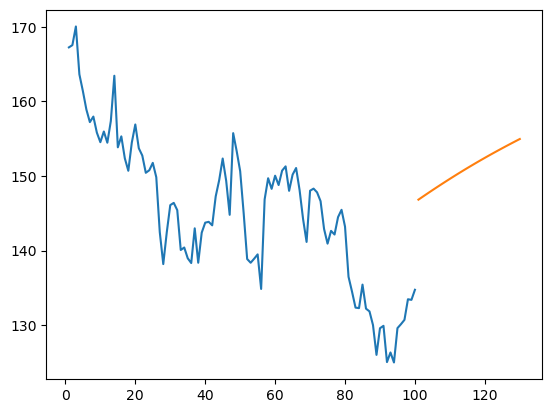

In [97]:
plt.plot(day_new,scale.inverse_transform(df3[1158:]))#inverse scaling of 100 days previos data
plt.plot(day_pred,scale.inverse_transform(lst_output))#inverse scaling to pot data on graph by its orginal; value of day_pred

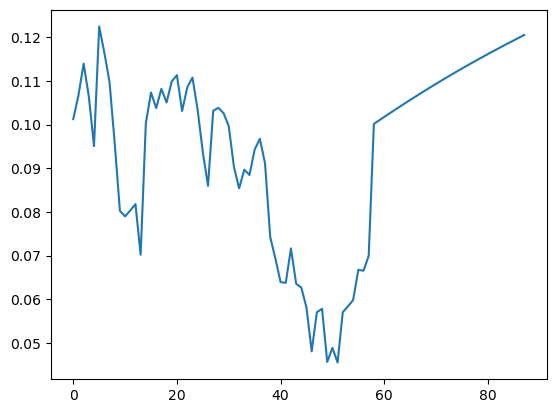

In [98]:
df4=df3.tolist()
df4.extend(lst_output)
plt.plot(df4[1200:])

In [99]:
df4=scale.inverse_transform(df4).tolist()

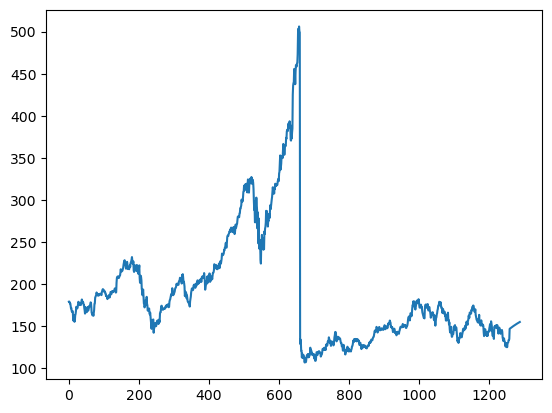

In [100]:
plt.plot(df4)